In [65]:
import numpy as np
import matplotlib.pyplot as plt

The aim in the following is to reproduce [lim x->10 of 1/floor(x)](https://math.stackexchange.com/questions/1377558/challenging-lim-x-rightarrow-10-frac1-lfloor-x-rfloor-frac110).
Which is a problem in Section 4.2 of Abbott.


In [66]:
def func(x):
    return 1.0 / np.floor(x)

func_vect = np.vectorize(func)

def eps_neigh(fx, c):
    return np.abs( fx - c )

eps_neigh_vect = np.vectorize(eps_neigh)

In [67]:
np.linspace(1, 2-0.001, 10)

array([1.   , 1.111, 1.222, 1.333, 1.444, 1.555, 1.666, 1.777, 1.888,
       1.999])

In [68]:
x = np.linspace(1, 2-0.001, 10)
fx = func_vect(x)
fx

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
eps = eps_neigh_vect(fx, 1/10)
eps

array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

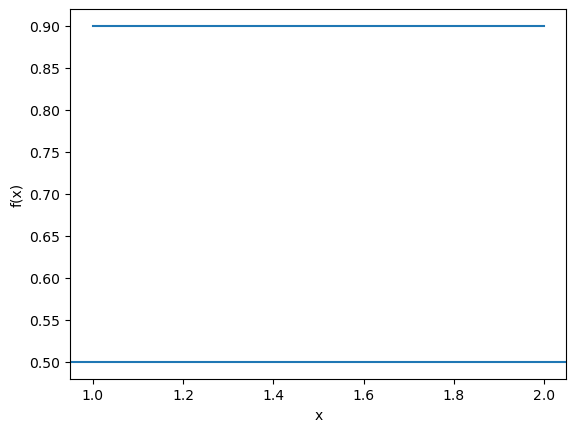

In [70]:
fig, ax = plt.subplots()

ax.plot(x, eps)

ax.axhline(1/2)
ax.set(xlabel="x", ylabel="f(x)")

plt.show()

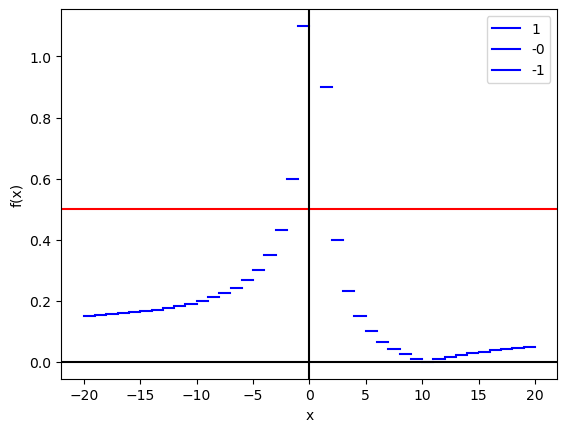

In [71]:
fig, ax = plt.subplots()

epsilon = 1/2

# Plot a line for each integer in [1,20).
for i in range(1, 20):
    x = np.linspace(i, (i+1)-0.001, 5)
    fx = func_vect(x)
    eps = eps_neigh_vect(fx, 1/10)

    if eps[0] > epsilon:
        ax.plot(x, eps, color="b", label=f"{i}")
    else:
        ax.plot(x, eps, color="b")

# Plot a line for each integer in (-20, 0].
for i in range(20):
    x = np.linspace(-i-0.999, -i-0.001, 5)
    fx = func_vect(x)
    eps = eps_neigh_vect(fx, 1/10)

    if eps[0] > epsilon:
        ax.plot(x, eps, color="b", label=f"-{i}")
    else:
        ax.plot(x, eps, color="b")

ax.axhline(epsilon, color="r")
ax.axhline(0, color="k")
ax.axvline(0, color="k")
ax.set(xlabel="x", ylabel="f(x)")
ax.legend()

plt.show()

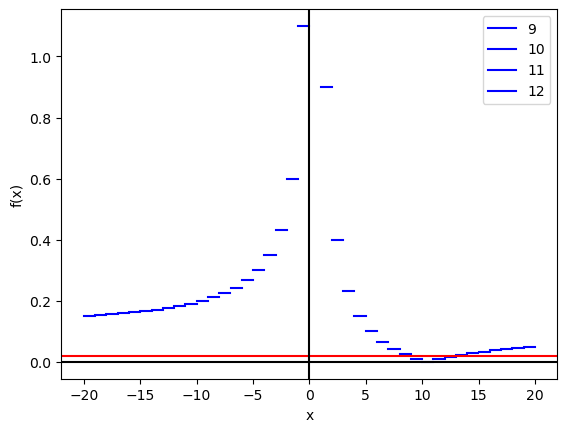

In [73]:
fig, ax = plt.subplots()

epsilon = 1/50

# Plot a line for each integer in [1,20).
for i in range(1, 20):
    x = np.linspace(i, (i+1)-0.001, 5)
    fx = func_vect(x)
    eps = eps_neigh_vect(fx, 1/10)

    if eps[0] < epsilon:
        ax.plot(x, eps, color="b", label=f"{i}")
    else:
        ax.plot(x, eps, color="b")

# Plot a line for each integer in (-20, 0].
for i in range(20):
    x = np.linspace(-i-0.999, -i-0.001, 5)
    fx = func_vect(x)
    eps = eps_neigh_vect(fx, 1/10)

    if eps[0] < epsilon:
        ax.plot(x, eps, color="b", label=f"-{i}")
    else:
        ax.plot(x, eps, color="b")

ax.axhline(epsilon, color="r")
ax.axhline(0, color="k")
ax.axvline(0, color="k")
ax.set(xlabel="x", ylabel="f(x)")
ax.legend()

plt.show()